In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('datasets/diamonds.csv', sep = ",", low_memory=False)

#remove the ids
df = df.drop(df.columns[0], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Check if exists missing values in each attribute

In [202]:
print("Missing values: ", df.isnull().sum())

Missing values:  carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### If you have missing values

In [198]:
df_with_NAs = pd.read_csv('datasets/NAs.txt', sep = "\t", low_memory=False)

#remove the ids
df_with_NAs = df_with_NAs.drop(df_with_NAs.columns[0], axis=1)
df_with_NAs.head()

,A,B,C
0,-0.166919,0.979728,-0.632955
1,-0.297953,-0.912674,-1.365463
2,-0.120211,-0.540679,-0.680481
3,NaN,-2.027325,1.533582
4,NaN,NaN,0.461821


### You can fill it in many ways, such as 0's, means, medians, drop them or fill it with regression algorithms

In [199]:
#df_with_NAs.fillna(0) # Replace all NaN elements with 0s
#df_with_NAs.fillna(df_with_NAs.mean()) # Replace all NaN elements with the mean of the column
df_with_NAs.fillna(df_with_NAs.median()) # Replace all NaN elements with the median of the column


#df_with_NAs.dropna(how ='any') # Drop the missing values

,A,B,C
0,-0.166919,0.979728,-0.632955
1,-0.297953,-0.912674,-1.365463
2,-0.120211,-0.540679,-0.680481
3,-0.232436,-2.027325,1.533582
4,-0.232436,-0.576511,0.461821
5,-0.788073,-0.576511,-0.632955
6,-0.916080,-0.612343,-0.632955
7,-0.887858,1.033826,-0.632955
8,1.948430,1.025011,-2.982224
9,0.019698,-0.795876,-0.046431


# Check if exists duplicated values

In [203]:
#see how many duplicated values exists
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  146


### See which are the duplicated values 

In [204]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


### Remove the duplicated values, keeping the first occurrence

In [3]:
df.drop_duplicates(keep=False,inplace=True) 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Check the mean of the numeric variables

In [206]:
df.mean()

carat       0.797619
depth      61.746778
table      57.459013
price    3933.273993
x           5.731281
y           5.734788
z           3.538700
dtype: float64

# Check the median of the numeric variables

In [207]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2403.00
x           5.70
y           5.71
z           3.53
dtype: float64

# Check the mode of the numeric variables

In [208]:
df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


# Check the variance of the numeric variables

In [209]:
df.var()

carat    2.234942e-01
depth    2.036734e+00
table    4.985408e+00
price    1.589360e+07
x        1.253485e+00
y        1.300162e+00
z        4.961128e-01
dtype: float64

# Check the standart desviation of the numeric variables

In [210]:
df.std()

carat       0.472752
depth       1.427142
table       2.232803
price    3986.677556
x           1.119591
y           1.140246
z           0.704353
dtype: float64

# Check how many types of cut, color and clarity of the diamond

__cut__ - cut quality <br>
__color__ - diamond's color - J (worst) to D (best)) <br>
__clarity__ - measurement of how clear is the diamond - I1 (worst), SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best)

In [89]:
cut = df['cut'].value_counts()
color = df['color'].value_counts()
clarity = df['clarity'].value_counts()
print(cut)
print(color)
print(clarity)

Ideal        21428
Premium      13705
Very Good    12056
Good          4876
Fair          1586
Name: cut, dtype: int64
G    11235
E     9755
F     9498
H     8240
D     6735
I     5392
J     2796
Name: color, dtype: int64
SI1     13002
VS2     12200
SI2      9106
VS1      8141
VVS2     5046
VVS1     3639
IF       1778
I1        739
Name: clarity, dtype: int64


# One Hot Encoding

To transform nominal attributes in numerical values.

In [4]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])
        
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# See the correlation between the attributes

In [103]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.018452,0.290598,-0.213837,0.027492,0.180560,0.921505,0.975667,0.952096,0.953697
cut,0.018452,1.000000,0.000476,0.028077,-0.192118,0.150409,0.040541,0.022838,0.028037,0.002845
color,0.290598,0.000476,1.000000,-0.028222,0.047872,0.025733,0.171131,0.269465,0.262719,0.267422
clarity,-0.213837,0.028077,-0.028222,1.000000,-0.053272,-0.087910,-0.070882,-0.225430,-0.217300,-0.223973
depth,0.027492,-0.192118,0.047872,-0.053272,1.000000,-0.299582,-0.011457,-0.025405,-0.029436,0.094592
table,0.180560,0.150409,0.025733,-0.087910,-0.299582,1.000000,0.125997,0.194360,0.182696,0.149604
price,0.921505,0.040541,0.171131,-0.070882,-0.011457,0.125997,1.000000,0.884569,0.865366,0.861161
x,0.975667,0.022838,0.269465,-0.225430,-0.025405,0.194360,0.884569,1.000000,0.974482,0.970600
y,0.952096,0.028037,0.262719,-0.217300,-0.029436,0.182696,0.865366,0.974482,1.000000,0.951681
z,0.953697,0.002845,0.267422,-0.223973,0.094592,0.149604,0.861161,0.970600,0.951681,1.000000


# Check the correlated variables with price (variable to predict)

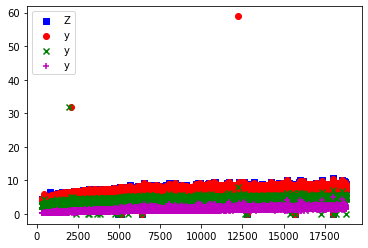

In [150]:
plt.scatter(df['price'],df['x'], c='b', marker='s', label='Z')
plt.scatter(df['price'], df['y'], c='r', marker='o', label='y')
plt.scatter(df['price'], df['z'], c='g', marker='x', label='y')
plt.scatter(df['price'], df['carat'], c='m', marker='+', label='y')
plt.legend(loc='upper left')
plt.show()

In [7]:
import seaborn as sns

In [8]:
dimonds_dimension = df.loc[:,'x':'z']
dimonds_dimension

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


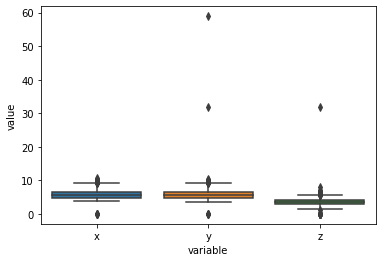

In [9]:
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_dimension))

plt.show()

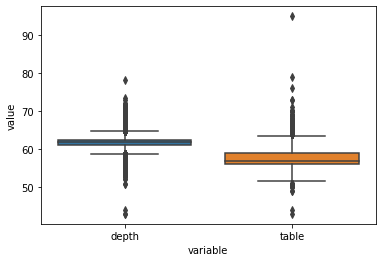

In [10]:
dimonds_depth = df.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth))

plt.show()

# Removing the outliers through z-score

In [12]:
from scipy import stats

In [13]:
df_without_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_without_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


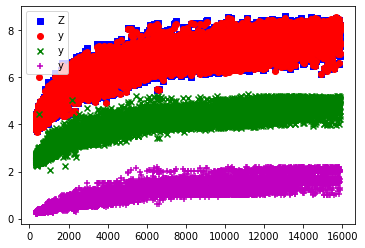

In [14]:
plt.scatter(df_without_outliers['price'],df_without_outliers['x'], c='b', marker='s', label='Z')
plt.scatter(df_without_outliers['price'], df_without_outliers['y'], c='r', marker='o', label='y')
plt.scatter(df_without_outliers['price'], df_without_outliers['z'], c='g', marker='x', label='y')
plt.scatter(df_without_outliers['price'], df_without_outliers['carat'], c='m', marker='+', label='y')
plt.legend(loc='upper left')
plt.show()

# Studying variables with the same unit measure throug boxplot

In [15]:
dimonds_dimension = df_without_outliers.loc[:,'x':'z']
dimonds_dimension

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
5,3.94,3.96,2.48
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


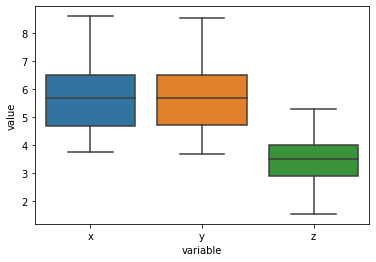

In [16]:
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_dimension))

plt.show()

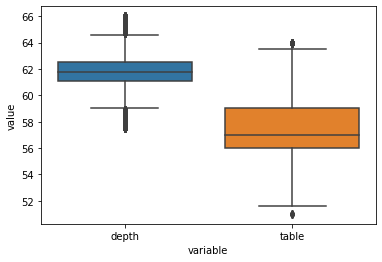

In [17]:
dimonds_depth = df_without_outliers.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth))

plt.show()

# Normalization methods

Standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation. The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with the mean round zero and standart desviation equals to 1.<br>

StandardScaler from sci-kit learn removes the mean and scales the data to unit variance.

In [124]:
scaler = StandardScaler() 
data_StandardScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_StandardScaler.columns =df_without_outliers.columns

In [112]:
data_StandardScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.249140,-0.597256,-0.924109,-0.500348,-0.198050,-1.129297,-0.949483,-1.617308,-1.602825,-1.632496
1,-1.296286,0.412793,-0.924109,-1.079900,-1.538904,1.727937,-0.949483,-1.674114,-1.736253,-1.816470
2,-1.107700,0.412793,1.436141,0.658756,0.511813,0.299320,-0.947154,-1.380615,-1.364562,-1.325874
3,-1.060554,-1.607306,2.026203,-0.500348,1.221677,0.299320,-0.946863,-1.248068,-1.250195,-1.141900
4,-1.225567,1.422843,2.026203,1.817859,0.827308,-0.176885,-0.946572,-1.626775,-1.621886,-1.555840
...,...,...,...,...,...,...,...,...,...,...
51318,-0.094050,-0.597256,-1.514171,-1.079900,-0.750166,-0.176885,-0.241806,0.086876,0.093611,0.007935
51319,-0.094050,-1.607306,-1.514171,-1.079900,1.063929,-1.129297,-0.241806,0.030070,0.084080,0.176577
51320,-0.141197,1.422843,-1.514171,-1.079900,0.827308,1.251732,-0.241806,0.001667,0.017366,0.099921
51321,0.235976,0.412793,0.846078,-0.500348,-0.592419,0.299320,-0.241806,0.465583,0.436710,0.375882


In [113]:
print(data_StandardScaler.mean(axis=0))
print(data_StandardScaler.std(axis=0))

carat     -3.325212e-14
cut       -2.191533e-15
color      2.718760e-14
clarity   -1.768650e-14
depth      1.104634e-15
table      1.376252e-14
price      3.477500e-15
x          1.416407e-14
y         -2.448785e-15
z         -5.786799e-15
dtype: float64
carat      1.00001
cut        1.00001
color      1.00001
clarity    1.00001
depth      1.00001
table      1.00001
price      1.00001
x          1.00001
y          1.00001
z          1.00001
dtype: float64


As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable values lie within the same range.

In [65]:
print('Min values: ', data_StandardScaler.min(axis=0))
print('Max values: ', data_StandardScaler.max(axis=0))

Min values:  carat     -1.319860
cut       -2.617355
color     -1.514171
clarity   -2.239004
depth     -3.352999
table     -3.034120
price     -0.949483
x         -1.825597
y         -1.888741
z         -3.012298
dtype: float64
Max values:  carat      3.418366
cut        1.422843
color      2.026203
clarity    1.817859
depth      3.351267
table      3.156555
price      3.580984
x          2.785166
y          2.752631
z          2.767538
dtype: float64


However, the minimum and maximum values vary according to how spread out the variable was, to begin with, and is highly influenced by the presence of outliers.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In this approach, the data is scaled to a fixed range — usually 0 to 1.<br>
In contrast to standardization, the cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers. Thus MinMax Scalar is sensitive to outliers.<br>
A Min-Max scaling is typically done via the following equation:

\begin{equation*}
Xnorm = \frac{X-Xmin}{(Xmax-Xmin)}
\end{equation*}

In [125]:
scaler = MinMaxScaler() 
data_MinMaxScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_MinMaxScaler.columns =df_without_outliers.columns

In [67]:
data_MinMaxScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.014925,0.50,0.166667,0.428571,0.470588,0.307692,0.000000,0.045175,0.061602,0.238727
1,0.004975,0.75,0.166667,0.285714,0.270588,0.769231,0.000000,0.032854,0.032854,0.206897
2,0.044776,0.75,0.833333,0.714286,0.576471,0.538462,0.000514,0.096509,0.112936,0.291777
3,0.054726,0.25,1.000000,0.428571,0.682353,0.538462,0.000578,0.125257,0.137577,0.323607
4,0.019900,1.00,1.000000,1.000000,0.623529,0.461538,0.000643,0.043121,0.057495,0.251989
...,...,...,...,...,...,...,...,...,...,...
51318,0.258706,0.50,0.000000,0.285714,0.388235,0.461538,0.156204,0.414784,0.427105,0.522546
51319,0.258706,0.25,0.000000,0.285714,0.658824,0.307692,0.156204,0.402464,0.425051,0.551724
51320,0.248756,1.00,0.000000,0.285714,0.623529,0.692308,0.156204,0.396304,0.410678,0.538462
51321,0.328358,0.75,0.666667,0.428571,0.411765,0.538462,0.156204,0.496920,0.501027,0.586207


In [68]:
print('means: ', data_MinMaxScaler.mean(axis=0))
print('std: ', data_MinMaxScaler.std(axis=0))

means:  carat      0.278556
cut        0.647828
color      0.427687
clarity    0.551905
depth      0.500129
table      0.490111
price      0.209577
x          0.395942
y          0.406936
z          0.521174
dtype: float64
std:  carat      0.211052
cut        0.247515
color      0.282459
clarity    0.246498
depth      0.149160
table      0.161535
price      0.220730
x          0.216886
y          0.215456
z          0.173017
dtype: float64


After MinMaxScaling, the distributions are not centered at zero and the standard deviation is not 1 like the other normalization.

In [69]:
print('Min: ', data_MinMaxScaler.min(axis=0))
print('Max: ', data_MinMaxScaler.max(axis=0))

Min:  carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64
Max:  carat      1.0
cut        1.0
color      1.0
clarity    1.0
depth      1.0
table      1.0
price      1.0
x          1.0
y          1.0
z          1.0
dtype: float64


But the minimum and maximum values are standardized across variables, different from what occurs with standardization.

In [36]:
from sklearn.preprocessing import RobustScaler

Scaling using median and quantiles consists of subtracting the median to all the observations and then dividing by the interquartile difference. It Scales features using statistics that are robust to outliers.<br>
The interquartile difference is the difference between the 75th and 25th quantile:

\begin{equation*}
IQR = \text{75th quantile} — \text{25th quantile}
\end{equation*}


The equation to calculate scaled values:

\begin{equation*}
Xscaled = \frac{X-Xmedian}{(IQR)}
\end{equation*}

In [126]:
scaler = RobustScaler() 
data_RobustScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_RobustScaler.columns =df_without_outliers.columns
data_RobustScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.746032,0.0,-0.666667,-0.333333,-0.214286,-0.666667,-0.480534,-0.950000,-0.938547,-0.955357
1,-0.777778,1.0,-0.666667,-0.666667,-1.428571,1.333333,-0.480534,-0.983333,-1.016760,-1.062500
2,-0.650794,1.0,0.666667,0.333333,0.428571,0.333333,-0.478593,-0.811111,-0.798883,-0.776786
3,-0.619048,-1.0,1.000000,-0.333333,1.071429,0.333333,-0.478351,-0.733333,-0.731844,-0.669643
4,-0.730159,2.0,1.000000,1.000000,0.714286,0.000000,-0.478108,-0.955556,-0.949721,-0.910714
...,...,...,...,...,...,...,...,...,...,...
51318,0.031746,0.0,-1.000000,-0.666667,-0.714286,0.000000,0.109157,0.050000,0.055866,0.000000
51319,0.031746,-1.0,-1.000000,-0.666667,0.928571,-0.666667,0.109157,0.016667,0.050279,0.098214
51320,0.000000,2.0,-1.000000,-0.666667,0.714286,1.000000,0.109157,0.000000,0.011173,0.053571
51321,0.253968,1.0,0.333333,-0.333333,-0.571429,0.333333,0.109157,0.272222,0.256983,0.214286


In [73]:
print('means: ', data_RobustScaler.mean(axis=0))
print('std: ', data_RobustScaler.std(axis=0))

means:  carat      0.095074
cut        0.591314
color     -0.144627
clarity   -0.045555
depth     -0.034930
table      0.123816
price      0.310649
x         -0.000978
y          0.000993
z         -0.004621
dtype: float64
std:  carat      0.673355
cut        0.990060
color      0.564918
clarity    0.575163
depth      0.905616
table      0.699984
price      0.833286
x          0.586797
y          0.586184
z          0.582388
dtype: float64


As you can see, the distributions are not centered in zero and the standard deviation is not 1 like Standardization normalization.

In [74]:
print('Min: ', data_RobustScaler.min(axis=0))
print('Max: ', data_RobustScaler.max(axis=0))

Min:  carat     -0.793651
cut       -2.000000
color     -1.000000
clarity   -1.333333
depth     -3.071429
table     -2.000000
price     -0.480534
x         -1.072222
y         -1.106145
z         -1.758929
dtype: float64
Max:  carat      2.396825
cut        2.000000
color      1.000000
clarity    1.000000
depth      3.000000
table      2.333333
price      3.294603
x          1.633333
y          1.614525
z          1.607143
dtype: float64


Neither are the minimum and maximum values set to a certain upper and lower boundaries like in the MinMaxScaler.

# See some boxplots to visualize the difference between the normalizations

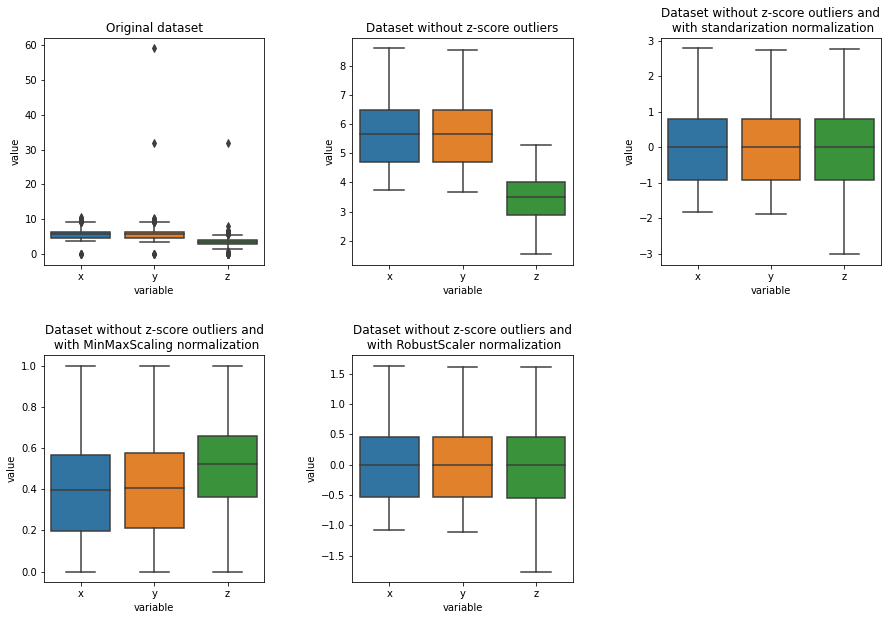

In [123]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with RobustScaler normalization')

plt.show()

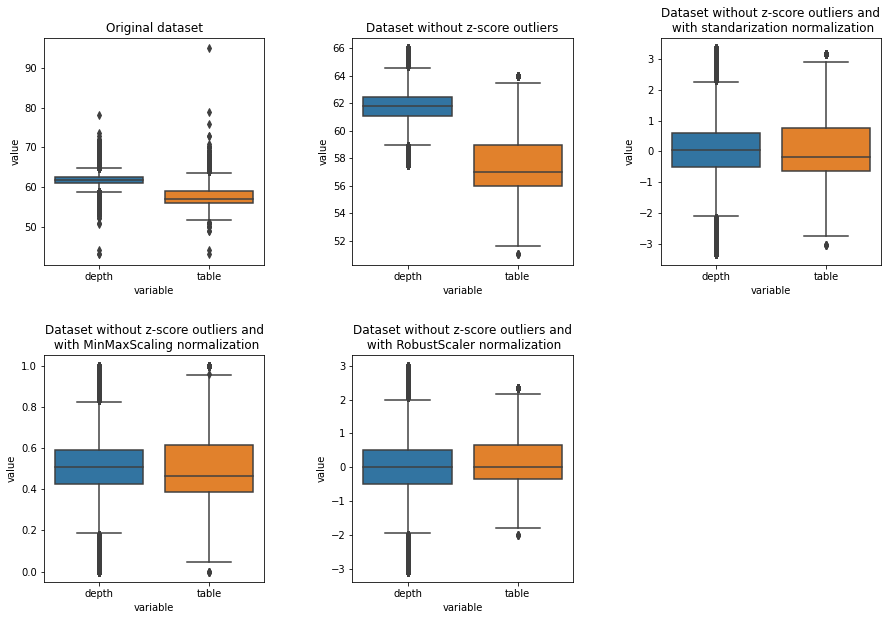

In [127]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers and\n with RobustScaler normalization')

plt.show()

# Boxplots to visualize the difference between the normalizations without remove the outliers through z-score 

In [128]:
scaler = StandardScaler() 
data_StandardScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_StandardScaler.columns =df_without_outliers.columns

In [129]:
scaler = MinMaxScaler() 
data_MinMaxScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_MinMaxScaler.columns =df_without_outliers.columns

In [130]:
scaler = RobustScaler() 
data_RobustScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_RobustScaler.columns =df_without_outliers.columns

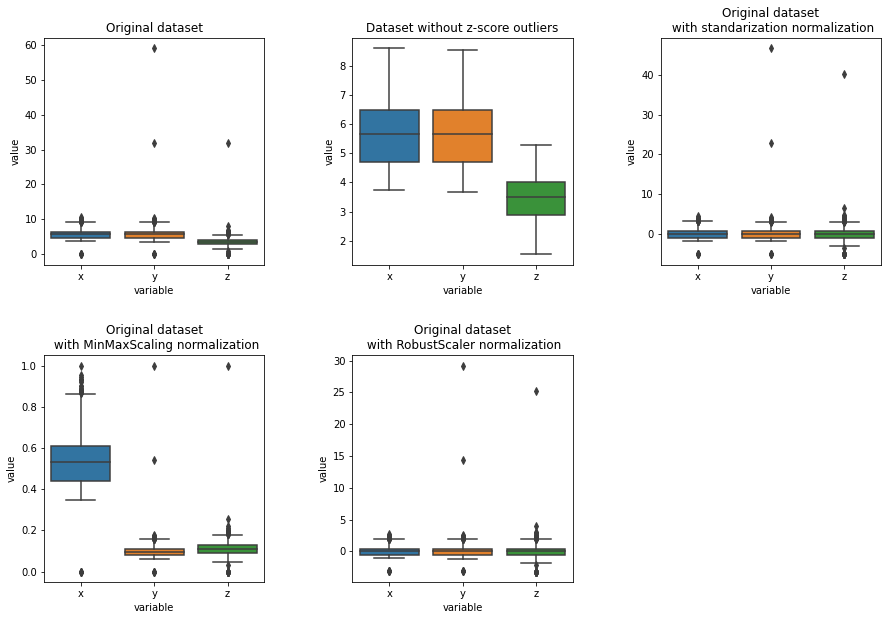

In [133]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'x':'z']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset\n with RobustScaler normalization')

plt.show()

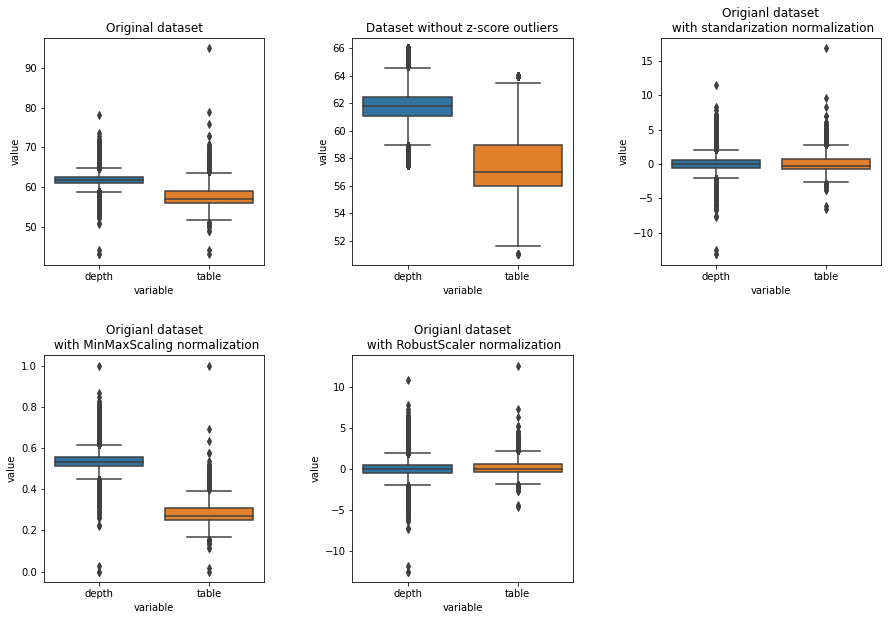

In [132]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Origianl dataset\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Origianl dataset\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'depth':'table']
sns.boxplot(x="variable", y="value", data=pd.melt(dimonds_depth)).set_title('Origianl dataset\n with RobustScaler normalization')

plt.show()